# Exploring AWS data with python and pandas

<img src="http://acinn.uibk.ac.at/sites/all/themes/imgi/images/acinn_logo.png" width="20%"  align="right">

This is a simple [jupyter notebook](http://jupyter.org/) created to illustrate its enormous potential for interactive data exploration and teaching. In this example we are going to explore meteorological data obtained at Zhadang Glacier, Tibetan Plateau.

**Author**: [Fabien Maussion](http://fabienmaussion.info/)

**Date**: 17.06.2016



## The automatic weather station (AWS)

<img src="https://dl.dropboxusercontent.com/u/20930277/do_not_delete/aws_tibet.jpg?raw=1" width="50%"  align="right">

The station is installed on the Zhadang glacier surface since 2009. 

- Location: 30.47153°N, 90.64534°E
- Altitude: 5665 m a.s.l.
- Variables: SWin, SWOut, LWOut, NetRad, Temp, RH, Wind speed & direction, SR50, Pressure, Precipitation, Ice temp


Related publications: 

[Maussion et al., (2011)](https://dl.dropboxusercontent.com/u/20930277/do_not_delete/Maussion_etal_2011.pdf), [Mölg et al., (2012)](http://www.the-cryosphere.net/6/1445/2012/tc-6-1445-2012.pdf), [Zhang et al., (2013)](http://www.cryoscience.net/pub/pdf/2013jg_zhang.pdf), [Huintjes et al., (2015)](http://www.bioone.org/doi/abs/10.1657/AAAR0014-073).


## Exploring the data 

We are going to use the [pandas](http://pandas.pydata.org/) library for the IO and the data crunching, [matplotlib](http://matplotlib.org/) and [seaborn](https://web.stanford.edu/~mwaskom/software/seaborn/) for the visualisation:

In [1]:
# import the modules we need
import numpy as np
import pandas as pd  
import matplotlib.pyplot as plt
import seaborn as sns
# some cosmetic defaults
sns.set_style('ticks')
sns.set_context('talk')
pd.options.display.max_rows = 14
%matplotlib inline 

In [2]:
# Read the data
df = pd.read_csv('aws_data_zhadang_UTC+6.csv', index_col=0, parse_dates=True)

df is a new variable we just created. It a short name for [DataFrame](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.html). A dataframe is a table, very similar to the data model of Excel (but muche more flexible and powerful). Let's simply print it:

In [3]:
df

,PRESSURE,ANGLE,WINDSPEED,NETRAD,RH,SWIN,SR50,TEMP,SWOUT,WINDDIR,SURFTEMP,PRCP
2010-10-02 00:00:00,507.133,2.209,1.500,-71.883,50.121,0.000,0.917,-2.887,0.000,191.563,-10.692,0.000000
2010-10-02 01:00:00,506.900,2.231,3.109,-85.910,45.190,0.000,0.916,-3.223,0.000,185.475,-11.491,0.000000
2010-10-02 02:00:00,506.483,2.203,3.217,-78.633,59.712,0.000,0.916,-3.912,0.000,149.389,-12.574,0.000000
2010-10-02 03:00:00,506.283,2.202,2.839,-74.421,64.127,0.000,0.916,-4.137,0.000,137.418,-13.135,0.000000
2010-10-02 04:00:00,506.000,2.234,3.335,-76.625,67.680,0.000,0.916,-4.241,0.000,135.399,-12.893,0.000000
2010-10-02 05:00:00,506.167,2.226,3.775,-76.633,64.840,0.000,0.918,-4.019,0.000,138.267,-12.780,0.000000
2010-10-02 06:00:00,506.450,2.177,3.512,-83.011,70.304,1.690,0.917,-4.500,1.690,140.116,-12.632,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...
2012-08-31 17:00:00,507.183,4.228,5.783,-1.609,93.368,72.083,-2.410,-1.040,63.353,317.309,-0.013,0.562083
2012-08-31 18:00:00,507.433,4.235,4.999,-3.011,93.749,20.835,-2.404,-1.251,19.145,326.103,-0.394,0.562083


The columns of a DataFrame can be extracted and plotted very easily: 

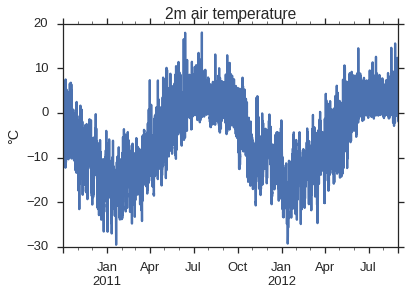

In [4]:
df['TEMP'].plot();
plt.ylabel('°C');
plt.title('2m air temperature');

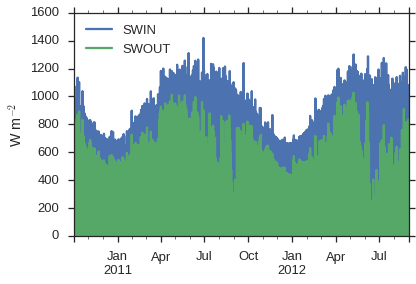

In [5]:
df[['SWIN', 'SWOUT']].plot();
plt.ylabel('W m$^{-2}$');

It is also possible to make more elaborated plots:

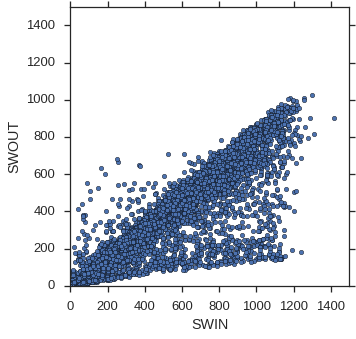

In [6]:
f, ax = plt.subplots(figsize=(5, 5));
df.plot(x='SWIN', y='SWOUT', kind='scatter', ax=ax);
ax.set_xlim([0, 1500]);
ax.set_ylim([0, 1500]);
ax.set_aspect('equal');

Note the clear clusters corresponding to the albedos of fresh snow and of ice, which also have a clearly defined physical limit. There are several outliers, related to the covering of the inciming SW sensor by snowfall.

With the help of seaborn, making even more sophisticated plots is very easy:

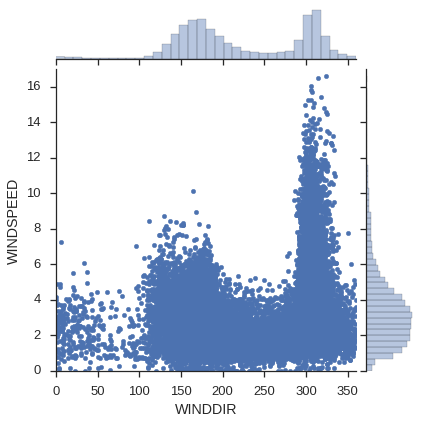

In [7]:
ax = sns.jointplot(x='WINDDIR', y='WINDSPEED', data=df, stat_func=None, xlim=[0, 360], ylim=[0, 17]);

We detect at least two preferred wind directions (north-westerly -from North West to South East-, and southerly -from South to North, or downglacier-). The highest wind speeds are observed when the winds are north-westerly. 

## Data crunching

Pandas excels at selecting, grouping, and analysing data. Let's start with building daily averages of our hourly records:

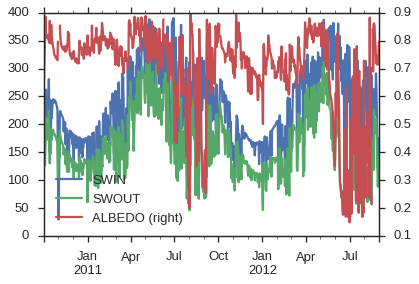

In [8]:
df_avg = df.resample('D').mean();
# Compute the daily albedo and filter out spurious values
df_avg['ALBEDO'] = df_avg['SWOUT'] / df_avg['SWIN']
df_avg['ALBEDO'] = np.where(df_avg['ALBEDO'] < 0.9, df_avg['ALBEDO'], np.NaN)
df_avg[['SWIN', 'SWOUT', 'ALBEDO']].plot(secondary_y='ALBEDO');

Compute monthly averages is as easy:

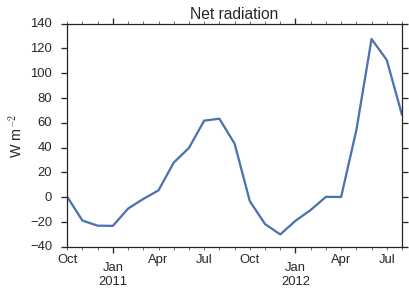

In [9]:
df_avg = df.resample('MS').mean();
df_avg['NETRAD'].plot();
plt.title('Net radiation')
plt.ylabel('W m$^{-2}$');

And so is the computation of the daily cycle for a specific month of the year:

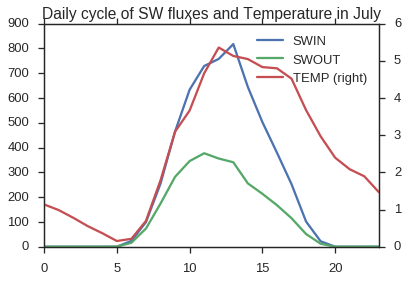

In [10]:
df_mon = df.loc[df.index.month == 7]
df_cycle = df_mon.groupby(df_mon.index.hour).mean()
df_cycle[['SWIN', 'SWOUT', 'TEMP']].plot(secondary_y='TEMP');
plt.title('Daily cycle of SW fluxes and Temperature in July');

## More examples

You will find much more examples and tutorials in the repository of the "Cryopshere and the Climate System" lecture [here](https://github.com/fmaussion/teaching/tree/master/ss_2016).